# Predicting Life Expectancy Using Machine Learning

<h3>Importing necessary libraries and dataset</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
%matplotlib inline

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_4b43c54c583841f880c5a22f2a2a920d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='****',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_4b43c54c583841f880c5a22f2a2a920d.get_object(Bucket='predictinglifeexpectancy-donotdelete-pr-u8zn3zg1prnnoc',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<h3>Renaming columns</h3>

In [3]:
df.rename(columns = {'Life expectancy ' : 'Life expectancy', 'infant deaths' : 'Infant deaths', 'percentage expenditure' : 'Healthcare expenditure', 'Measles ' : 'Measles', ' BMI ' : 'BMI', 'under-five deaths ' : 'Under-five deaths', 'Diphtheria ' : 'Diphtheria', ' HIV/AIDS' : 'HIV/AIDS', ' thinness  1-19 years' : 'Thinness 1-19 years', ' thinness 5-9 years' : 'Thinness 5-9 years', 'Income composition of resources' : 'Income'}, inplace = True)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Healthcare expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.describe()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Healthcare expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                   2938 non-null object
Year                      2938 non-null int64
Status                    2938 non-null object
Life expectancy           2928 non-null float64
Adult Mortality           2928 non-null float64
Infant deaths             2938 non-null int64
Alcohol                   2744 non-null float64
Healthcare expenditure    2938 non-null float64
Hepatitis B               2385 non-null float64
Measles                   2938 non-null int64
BMI                       2904 non-null float64
Under-five deaths         2938 non-null int64
Polio                     2919 non-null float64
Total expenditure         2712 non-null float64
Diphtheria                2919 non-null float64
HIV/AIDS                  2938 non-null float64
GDP                       2490 non-null float64
Population                2286 non-null float64
Thinness 1-19 years       2904 non-null

<h3>Dimension of Dataset</h3>

In [6]:
df.shape

(2938, 22)

<h3>Replacing missing data with mean</h3>

In [7]:
df.isnull().sum()

Country                     0
Year                        0
Status                      0
Life expectancy            10
Adult Mortality            10
Infant deaths               0
Alcohol                   194
Healthcare expenditure      0
Hepatitis B               553
Measles                     0
BMI                        34
Under-five deaths           0
Polio                      19
Total expenditure         226
Diphtheria                 19
HIV/AIDS                    0
GDP                       448
Population                652
Thinness 1-19 years        34
Thinness 5-9 years         34
Income                    167
Schooling                 163
dtype: int64

In [8]:
df.fillna(df.mean(), inplace = True)

In [9]:
df.isnull().sum()

Country                   0
Year                      0
Status                    0
Life expectancy           0
Adult Mortality           0
Infant deaths             0
Alcohol                   0
Healthcare expenditure    0
Hepatitis B               0
Measles                   0
BMI                       0
Under-five deaths         0
Polio                     0
Total expenditure         0
Diphtheria                0
HIV/AIDS                  0
GDP                       0
Population                0
Thinness 1-19 years       0
Thinness 5-9 years        0
Income                    0
Schooling                 0
dtype: int64

<h3>Mapping object datatype</h3>

In [10]:
df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [11]:
df['Status'] = df.Status.map({'Developing':0, 'Developed':1})

In [12]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Healthcare expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<h3>Visualizing the correlation</h3>

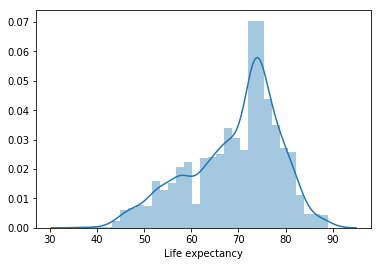

In [13]:
sns.distplot(df['Life expectancy'])

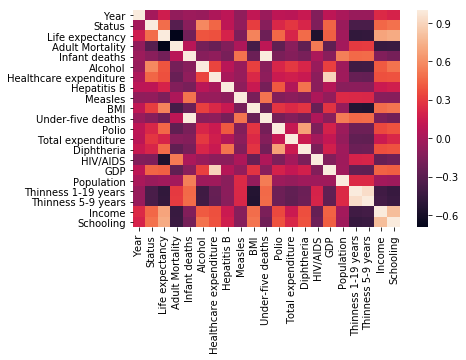

In [14]:
sns.heatmap(df.corr())

<h3>Splitting the dataset</h3>

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(['Country', 'Life expectancy'], axis = 1)

In [17]:
Y = df['Life expectancy']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)

<h3>Linear regression</h3>

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lreg = LinearRegression()

In [21]:
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
lpred = lreg.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
print(mean_squared_error(Y_test, lpred)**(0.5))

3.9021244402990414


In [25]:
print('Training accuracy:', lreg.score(X_train, Y_train))
print('Testing accuracy:', lreg.score(X_test, Y_test))

Training accuracy: 0.8169511754768795
Testing accuracy: 0.8294542700921573


In [26]:
from sklearn.metrics import r2_score

In [27]:
lscore = r2_score(Y_test, lpred)

In [28]:
lscore

0.8294542700921573

Random forest regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor(n_estimators = 60)

In [31]:
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
rpred = rf.predict(X_test)

In [33]:
print(mean_squared_error(Y_test, rpred)**(0.5))

1.8453772365389667


In [34]:
print('Training accuracy:', rf.score(X_train, Y_train))
print('Testing accuracy:', rf.score(X_test, Y_test))

Training accuracy: 0.994400979461148
Testing accuracy: 0.9618575190396461


In [35]:
rscore = r2_score(Y_test, rpred)

In [190]:
rscore

0.962752271867316

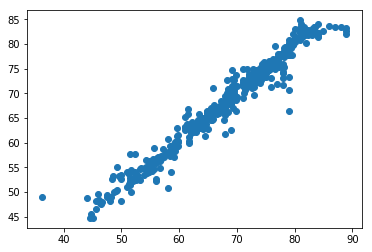

In [188]:
plt.scatter(Y_test, rpred)

In [191]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-05 10:31:39,769 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [193]:
wml_credentials={
  "apikey": "****",
  "iam_apikey_description": "Auto-generated for key ****",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/5f6defa0a49c4122a78969055da3b492::serviceid:ServiceId-06444e8f-6838-4a18-ad06-3f6020ad74b5",
  "instance_id": "6c3123f4-d786-4828-b436-b26ba30***",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [194]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [195]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Shivani", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "shivanichauhan781@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Life Expectancy Model"}

model_artifact=client.repository.store_model(rf, meta_props=model_props)

In [196]:
client.repository.list()

------------------------------------  ---------------------  ------------------------  -----------------  -----
GUID                                  NAME                   CREATED                   FRAMEWORK          TYPE
f16cd1d9-3269-4f29-8ece-fe1e2720e0c7  Life Expectancy Model  2020-06-05T10:31:40.304Z  scikit-learn-0.20  model
------------------------------------  ---------------------  ------------------------  -----------------  -----


In [197]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [198]:
deployment = client.deployments.create(published_model_uid, name="Life expectancy deployment")



#######################################################################################

Synchronous deployment creation for uid: 'f16cd1d9-3269-4f29-8ece-fe1e2720e0c7' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='f2f8e6c8-82b9-4ee7-865a-0bbc7c231574'
------------------------------------------------------------------------------------------------




In [ ]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)